In [40]:
#matplot inline magic command
%matplotlib inline
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd 

In [41]:
city_data_to_load= "Resources/city_data.csv"
ride_data_to_load= "Resources/ride_data.csv"

In [42]:
city_data_df= pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [43]:
ride_data_df= pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739411e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343912e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005066e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149245e+12
4,South Jack,3/6/19 4:28,34.58,3.908451e+12
5,South Latoya,3/11/19 12:26,9.52,1.994999e+12
6,New Paulville,2/27/19 11:17,43.25,7.932084e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119539e+11
8,South Karenland,1/8/19 3:28,35.09,7.995623e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327642e+12


In [44]:
#this is where we start to clean the data- look for nulls- incorrect info etc
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [45]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [46]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [47]:
#now we find the unique values 
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [48]:
#this allows us to get the SUM of each type 
sum(city_data_df["type"]=="Urban")

66

In [49]:
sum(city_data_df["type"]=="Rural")

18

In [50]:
sum(city_data_df["type"]=="Suburban")

36

In [51]:
#we clean the data for the other CSV
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [52]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [53]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [54]:
#time to merge the DF 
#new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908451e+12,46,Urban


In [61]:
#urban DF
urban_cities_df= pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908451e+12,46,Urban


In [62]:
#rural Df
rural_cities_df= pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/19 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/19 14:54,12.42,1.985256e+12,8,Rural
2252,Michaelberg,3/27/19 18:27,54.85,4.421837e+12,6,Rural
2253,Lake Latoyabury,2/23/19 21:12,47.90,3.269653e+12,2,Rural
2254,Lake Latoyabury,5/6/19 8:57,51.80,4.018025e+12,2,Rural


In [63]:
#Suburban DF
suburban_cities_df= pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/19 3:08,27.79,6.653623e+12,11,Suburban
1626,East Kentstad,4/7/19 19:44,18.75,6.575961e+12,20,Suburban
1627,Lake Omar,1/17/19 21:33,21.71,9.669117e+11,22,Suburban
1628,Myersshire,2/27/19 17:38,17.10,5.706771e+12,19,Suburban
1629,West Hannah,4/19/19 1:06,37.78,2.273047e+12,12,Suburban


In [65]:
#ride count per city
urban_ride_count= urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [66]:
rural_ride_count= rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [68]:
suburban_ride_count= suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [69]:
#average fare for each city
urban_avg_fare= urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [70]:
rural_avg_fare= rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [71]:
suburban_avg_fare= suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [74]:
#average number of drivers per city
urban_avg_drivers= urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [72]:
 rural_avg_drivers= rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [73]:
suburban_avg_drivers= suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

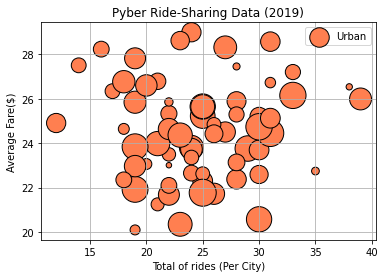

In [94]:
#scatter plot CITY ;)
#alpha= transparency 0.1 translucent and 1 pigmented
#remember "s" will adjust the size of the bubbles
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s= 10*urban_avg_drivers,
            color= "coral",
            edgecolor= "black", linewidths=1,
            alpha= 1, label="Urban")
plt.grid(True)
plt.ylabel("Average Fare($)")
plt.xlabel("Total of rides (Per City)")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.legend()

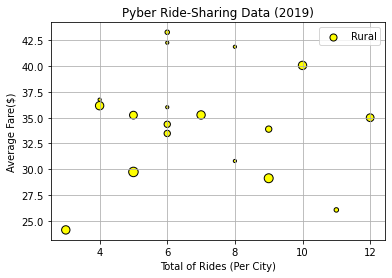

In [105]:
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s= 10*rural_avg_drivers,
            color="yellow",
            edgecolor="black", linewidth=1,
            alpha=1, label="Rural")
plt.grid(True)
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend()

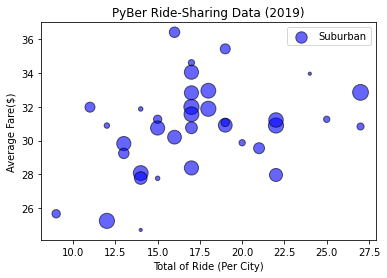

In [106]:
#you can abb. color with c!!!! 
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10* suburban_avg_drivers,
            c="blue",
            edgecolor= "black", linewidth= 1,
            alpha=.6, label= "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total of Ride (Per City)")
plt.ylabel("Average Fare($)")
plt.legend()

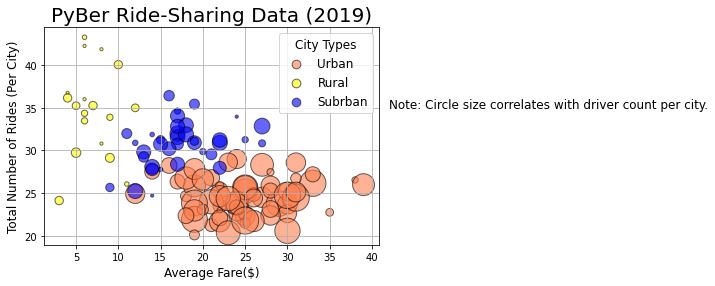

In [241]:
#combine all the plots
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_avg_drivers, c="coral",
            edgecolor= "black", linewidths= 1,
            alpha= .6, label= "Urban")
#rural is so small despite the color and the transprency its hard to see 
#the overlap 
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_avg_drivers, c="yellow",
            edgecolor= "black", linewidths= 1,
            alpha= .6, label= "Rural")
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_avg_drivers, c="blue",
            edgecolor= "black", linewidths= 1,
            alpha= .6, label= "Subrban")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Average Fare($)", fontsize=12)
plt.ylabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
#plt.legend()
#replacing plt.legend() so the legend bubbles are the same size and edit the general legend
# #MAKE SUREEEE!!! capital H in handles!! super important
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
#adds the note to the side- niffty 
plt.savefig("analysis/Fig1.png")
plt.show()
#when the image is saved after the show it comes but blank 
#plt.savefig("analysis/Fig1.png")

In [128]:
#city stats (mean, mode, st. dev, total, min max, etc) 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [129]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [130]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [131]:
#ride count stats 
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [132]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [133]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [136]:
#mean of the ride count- its included in the describe- this will be rounded 
round(urban_ride_count.mean(), 2), round(rural_ride_count.describe().mean(), 2), round(suburban_ride_count.describe().mean(), 2)

(24.62, 7.81, 17.99)

In [139]:
#median
round(urban_ride_count.median(),2), round(rural_ride_count.describe().median(),2), round(suburban_ride_count.describe().median(),2)

(24.0, 6.47, 17.18)

In [140]:
#mode
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [141]:
rural_ride_count.mode()

0    6
dtype: int64

In [142]:
suburban_ride_count.mode()

0    17
dtype: int64

In [144]:
import numpy as np
import scipy.stats as sts

In [152]:
#central tendency-URBAN aka mean median mode
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
#NOTE: remember if ones running- commment out the ones that are ok- and figure out
#the problematic one 
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

#modes different- USE sts. 
mode_urban_ride_count= sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
#count array is the amount of times the mode appears 

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [155]:
#central tendency-RURAL aka mean median mode
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

#modes different- USE sts. 
mode_rural_ride_count= sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [156]:
#central tendency-RURAL aka mean median mode
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

#modes different- USE sts. 
mode_suburban_ride_count= sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")



The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [157]:
#central tendency for FARES
#time to make a new DF for fares 
urban_fares= urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [159]:
rural_fares= rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [160]:
suburban_fares= suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [171]:
#central tendencys begins- URBAN 
mean_urban_fares= np.mean(urban_fares)
print(f"The mean price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares= np.median(urban_fares)
print(f"The median price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares= sts.mode(urban_fares)
print(f" The mode price for urban trips is ${mode_urban_fares}.")

The mean price for urban trips is $24.53.
The median price for urban trips is $24.64.
 The mode price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [172]:
#RURAL
mean_rural_fares= np.mean(rural_fares)
print(f"The mean price for rural trips is ${mean_rural_fares:.2f}.")
      
      
median_rural_fares= np.median(rural_fares)
print(f"The median price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares= sts.mode(rural_fares)
print(f" The mode price for rural trips is ${mode_rural_fares}.")

The mean price for rural trips is $34.62.
The median price for rural trips is $37.05.
 The mode price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [173]:
#SUBURBAN
mean_suburban_fares= np.mean(suburban_fares)
print(f"The mean price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares= np.median(suburban_fares)
print(f"The median price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares= sts.mode(urban_fares)
print(f" The mode price for suburban trips is ${mode_suburban_fares}.")

The mean price for suburban trips is $30.97.
The median price for suburban trips is $30.75.
 The mode price for suburban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [174]:
#driver count per city 
#URBAN DF
urban_drivers= urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [177]:
#RURAL Df 
rural_drivers= rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [178]:
#SUBURBAN DF
suburban_drivers= suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [184]:
#central tendency- for the driver counts 
#URBAN
#Make it whole numbers- theres no quarter of a driver
mean_urban_drivers= np.mean(urban_drivers)
print(f"The mean driver count in urban areas is {mean_urban_drivers:.0f}.")

median_urban_drivers= np.median(urban_drivers)
print(f"The median driver count in urban areas is {median_urban_drivers:.0f}.")

mode_urban_drivers= sts.mode(urban_drivers)
print(f"The mode driver count in urban areas is {mode_urban_drivers}.")

The mean driver count in urban areas is 37.
The median driver count in urban areas is 37.
The mode driver count in urban areas is ModeResult(mode=array([39]), count=array([86])).


In [187]:
#RURAL
mean_rural_drivers= np.mean(rural_drivers)
print(f"The mean driver count in rural areas is {mean_rural_drivers:.0f}.")

median_rural_drivers= np.median(rural_drivers)
print(f"The median driver count in rural areas is {median_rural_drivers:.0f}.")

mode_rural_drivers= sts.mode(rural_drivers)
print(f"The mode driver count in rural areas is {mode_rural_drivers}.")

The mean driver count in rural areas is 4.
The median driver count in rural areas is 4.
The mode driver count in rural areas is ModeResult(mode=array([1]), count=array([32])).


In [186]:
#SUBURBAN
mean_suburban_drivers= np.mean(suburban_drivers)
print(f"The mean driver count in suburban areas is {mean_suburban_drivers:.0f}.")

median_suburban_drivers= np.median(suburban_drivers)
print(f"The median driver count in suburban areas is {median_suburban_drivers:.0f}.")

mode_suburban_drivers= sts.mode(urban_drivers)
print(f"The mode driver count in suburban areas is {mode_suburban_drivers}.")

The mean driver count in suburban areas is 14.
The median driver count in suburban areas is 16.
The mode driver count in suburban areas is ModeResult(mode=array([39]), count=array([86])).


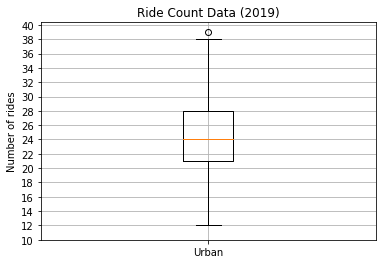

In [253]:
#PLOT time- box and whiskers ONLY urban 
#top 3 lines= the actual Box and Whisk
#plt.text(14,14, "Note: There is an outlier, around 39.", fontsize="12")
x_labels= ["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_ride_count, labels= x_labels)

#add the edits/designs 
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
#figure out why the note either shrinks the whole graphs or shows at the bottom awkwardly
# plt.text(1,3, "Note: There is an outlier, around 39.", fontsize="12")

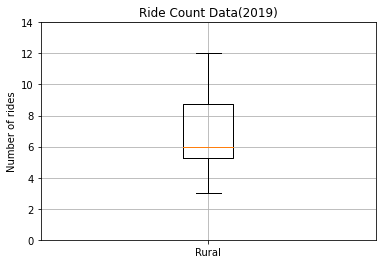

In [226]:
# Practice- for RURAl and then SUBURBAN 
x_labels= ["Rural"]
fig, ax= plt.subplots()
ax.boxplot(rural_ride_count, labels= x_labels)
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of rides')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()

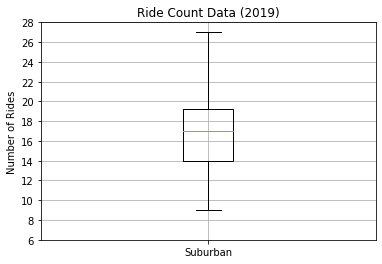

In [227]:
x_labels= ["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6,30, step=2.0))
ax.grid()
plt.show()

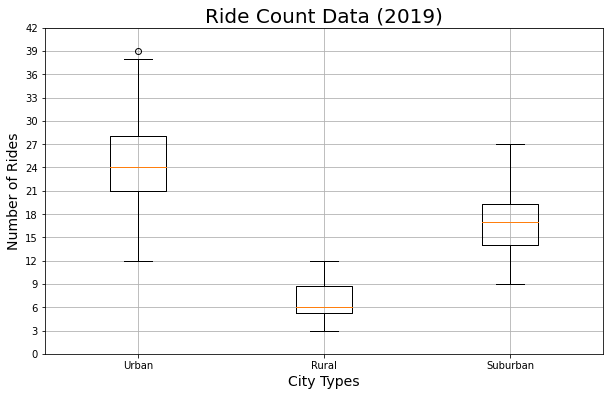

In [242]:
#consolidate the graphs 
x_labels=["Urban", "Rural", "Suburban"]
ride_count_data= [urban_ride_count, rural_ride_count, suburban_ride_count]
fig, ax=plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize= 20)
ax.set_ylabel("Number of Rides", fontsize= 14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels= x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
#SAVEEEE
plt.savefig("analysis/Fig2.png")
plt.show()

In [254]:
#try and fnd the outlier 
urban_city_outlier= urban_ride_count[urban_ride_count== 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


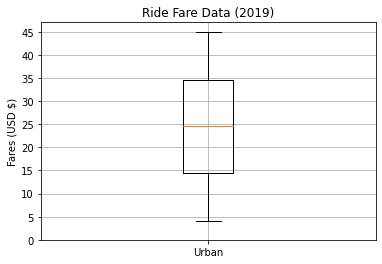

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [264]:
#do the same-- BUT for fares 
x_labels= ["Urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_fares, labels= x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fares (USD $)')
ax.set_yticks(np. arange (0, 50, step= 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

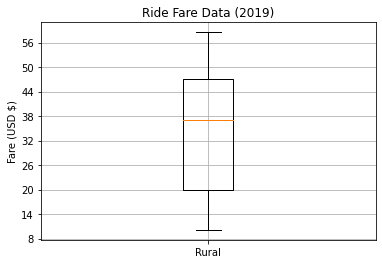

In [269]:
#box and whisk for rural and suburban fares 
x_labels= ["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_fares, labels= x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (USD $)')
ax.set_yticks(np.arange (8, 60, step=6.0))
ax.grid()
plt.show()

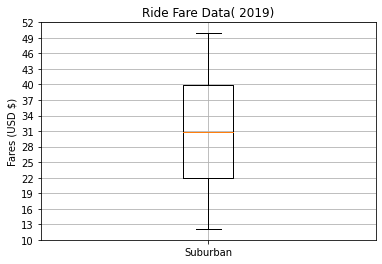

In [276]:
x_labels=["Suburban"]
fig, ax= plt.subplots()
ax.boxplot(suburban_fares, labels= x_labels)
ax.set_title('Ride Fare Data( 2019)')
ax.set_ylabel('Fares (USD $)')
ax.set_yticks(np.arange(10, 54, step=3.0))
ax.grid()
plt.show()

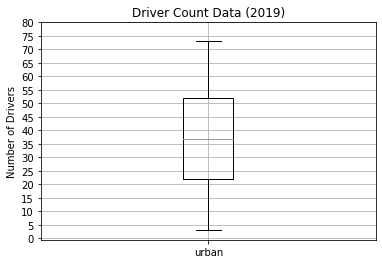

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [281]:
#driver count- box and whisk 
#urban
x_labels= ["urban"]
fig, ax= plt.subplots()
ax.boxplot(urban_drivers, labels= x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,85, step=5.0))
ax.grid()
plt.show()
urban_drivers.describe()

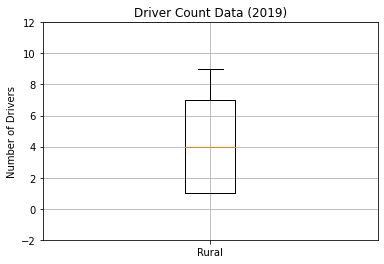

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [288]:
#rural
x_labels= ['Rural']
fig, ax=plt.subplots()
ax.boxplot(rural_drivers, labels= x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(-2,14, step=2.0))
ax.grid()
plt.show()
rural_drivers.describe()

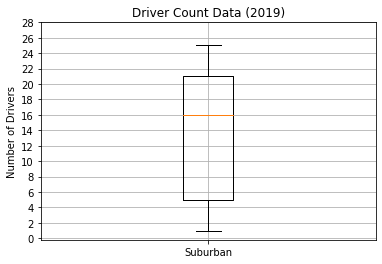

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [294]:
#Suburban
x_labels= ['Suburban']
fig, ax=plt.subplots()
ax.boxplot(suburban_drivers, labels= x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,30, step=2.0))
ax.grid()
plt.show()
suburban_drivers.describe()

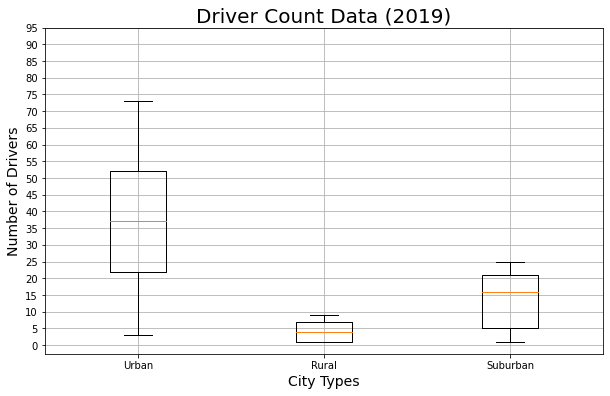

In [303]:
#combine the graphs 
x_labels=["Urban", "Rural", "Suburban"]
Drivers=[urban_drivers, rural_drivers, suburban_drivers]
fig, ax= plt.subplots(figsize=(10,6))
ax.boxplot(Drivers, labels=x_labels)
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize= 14)
ax.set_xlabel("City Types", fontsize= 14)
ax.set_yticks(np.arange(0, 100, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

In [304]:
#gather the sum of the fares by city type so we can make a pie chart 
sum_fares_by_type= pyber_data_df.groupby(['type']).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [305]:
#total fares 
total_fares= pyber_data_df["fare"].sum()
total_fares

63538.64

In [306]:
#fare percentages- by city type 
type_percents= sum_fares_by_type/total_fares *100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [312]:
#a nicer cleaner version- all of the above made into one chunk of code 
type_percent= pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum() *100
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

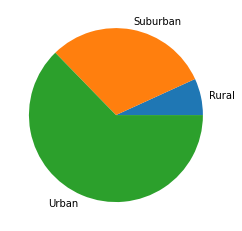

In [313]:
#pie time 
plt.pie(type_percent, labels=["Rural", "Suburban", "Urban"])
plt.show()

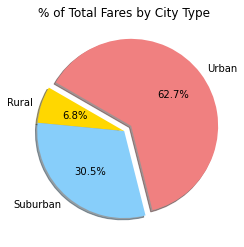

In [315]:
plt.pie(type_percent, 
        labels=["Rural", "Suburban", "Urban"],
        colors= ["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow= True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

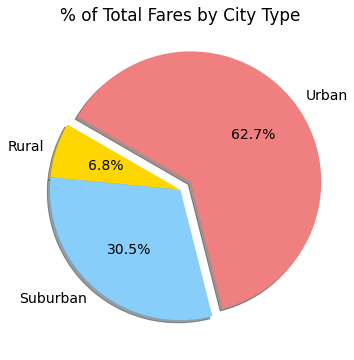

In [320]:
#adding mpl to change the plot config using rcParams
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(type_percent, 
        labels=["Rural", "Suburban", "Urban"],
        colors= ["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow= True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig5.png")
plt.show()

In [321]:
#ride percentages
ride_percent= pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count() *100
ride_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

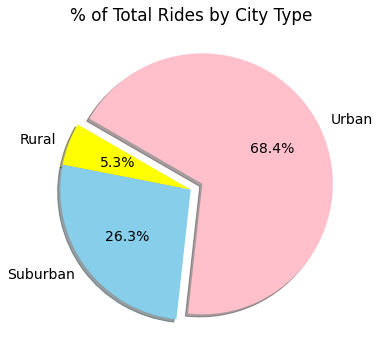

In [323]:
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(ride_percent, 
        labels=["Rural", "Suburban", "Urban"],
        colors= ["yellow", "skyblue", "pink"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow= True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig6.png")
plt.show()

In [324]:
#drivers for each city%%
driver_percents= city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df['driver_count'].sum() *100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

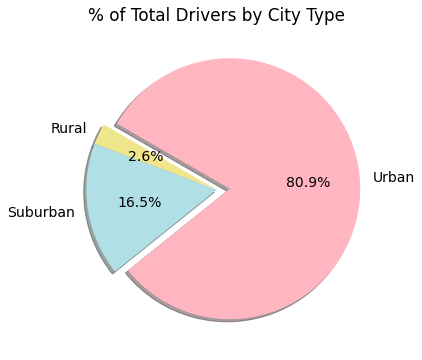

In [326]:
#adding mpl to change the plot config using rcParams
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors= ["khaki", "powderblue", "lightpink"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow= True, startangle=150)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size']=14
plt.savefig("analysis/Fig7.png")
plt.show()